# Plotting

Spatialproteomics has a variety of plotting functions, enabling the plotting of intensities, segmentation masks, and predicted cell type labels.

In [38]:
%reload_ext autoreload
%autoreload 2

import spatialproteomics
import matplotlib.pyplot as plt
import xarray as xr
xr.set_options(display_style='text')

In [39]:
# loading in a data set and performing some formatting for convenience
ds = xr.load_dataset('../../data/BNHL_166_4_I2_LK.zarr')
ds["_properties"] = ds["_labels"]
ds = ds.pp.drop_layers("_labels")

/home/meyerben/meyerben/.conda/envs/spatprot_vscode_env/lib/python3.10/site-packages/xarray/backends/plugins.py:139: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [40]:
# having a look at the dataset
ds

<xarray.Dataset>
Dimensions:        (cells: 12560, channels: 56, y: 3000, x: 3000, features: 4,
                    labels: 8, props: 2)
Coordinates:
  * cells          (cells) int64 1 2 3 4 5 6 ... 12556 12557 12558 12559 12560
  * channels       (channels) <U11 'DAPI' 'Helios' 'CD10' ... 'CD79a' 'Ki-67'
  * features       (features) <U10 'centroid-0' 'centroid-1' ... '_original_'
  * labels         (labels) int64 1 2 3 4 5 6 7 8
  * props          (props) <U6 '_color' '_name'
  * x              (x) int64 0 1 2 3 4 5 6 ... 2994 2995 2996 2997 2998 2999
  * y              (y) int64 0 1 2 3 4 5 6 ... 2994 2995 2996 2997 2998 2999
Data variables:
    _arcsinh_mean  (cells, channels) float64 3.111 0.0 1.391 ... 1.324 0.4174
    _arcsinh_sum   (cells, channels) float64 8.346 0.0 6.564 ... 6.625 5.224
    _image         (channels, y, x) uint8 4 4 4 4 5 4 4 3 4 ... 2 2 2 2 2 2 2 2
    _obs           (cells, features) float64 613.3 768.4 4.0 ... 8.0 7.0
    _raw_mean      (cells, channels) float64 56.02 0.0 9.426 ... 8.727 2.148
    _raw_sum       (cells, channels) float64 1.053e+04 0.0 ... 1.885e+03 464.0
    _segmentation  (y, x) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    _properties    (labels, props) object 'C3' ... 'B (PAX5)'

## Plotting Channel Intensities

The slicing capabilities of `xarray` make data visualization very easy. The general pattern is here to first select the channels, image regions and labels of interest, and then to use the plotting functions that are available via the `.pl` accessor. Images can be shown by using the `pl.show()` method.

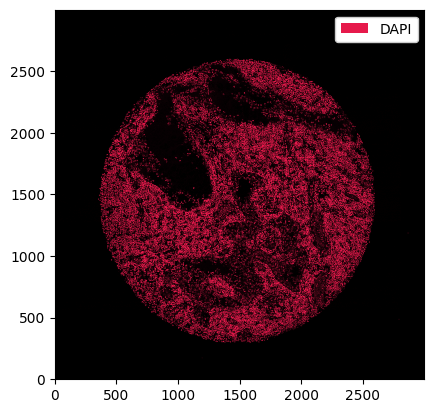

In [41]:
# selecting the DAPI channel and showing the result with pl.show()
_ = ds.pp['DAPI'].pl.show()

If we want different colors, we can specify those using the `pl.colorize` method.

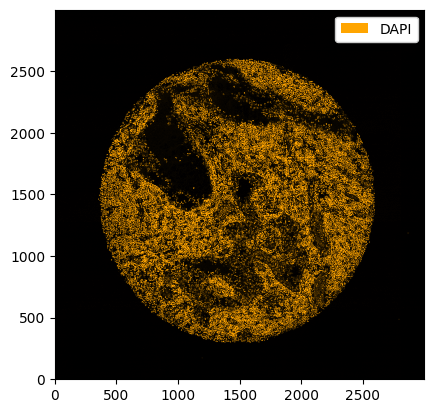

In [42]:
_ = ds.pp['DAPI'].pl.colorize(['orange']).pl.show()

The `pl.colorize` function allows us to make image overlays quickly by first selecting the channels of interest. We illustrate this by first selecting the CD4 and CD8 channels and then assigning the colors.

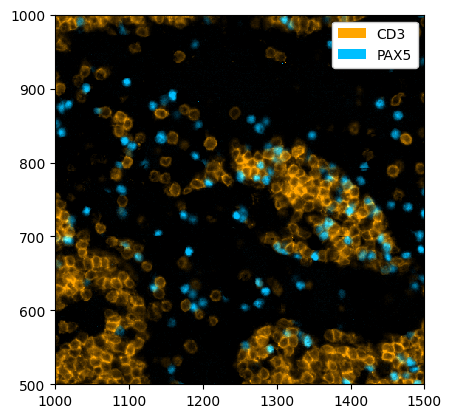

In [43]:
_ = ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000].pl.colorize(colors=['orange', 'deepskyblue']).pl.show()

All plotting functions accept `matplotlib.Axes` via the `ax` argument. This enables to easily modify plots using the normal `matplotlib` API. For example, let's say we want to plot multiple channels in different subplots.

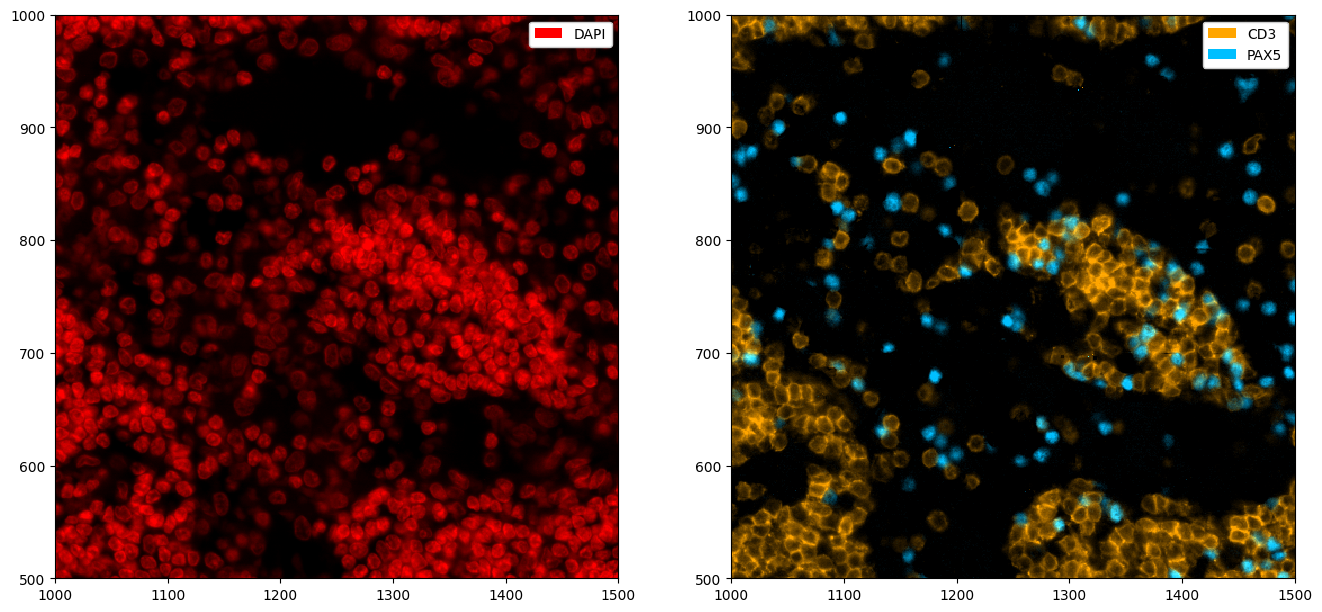

In [44]:
# creating two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# populating the first subplot
# note how we set ax=ax[0] to tell the plotting function to use the first subplot
_ = ds.pp['DAPI', 1000:1500, 500:1000].pl.colorize(colors=['red']).pl.show(ax=ax[0])
# populating the second subplot
_ = ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000].pl.colorize(colors=['orange', 'deepskyblue']).pl.show(ax=ax[1])


By default, a legend showing the colors corresponding to the channels is shown. You can disable this with the `legend_image` argument. In addition, matplotlib functions can be used to further alter the plot, e. g. to remove ticklabels.
The code snipped below also highlights the `pl.autocrop()` function, which can be useful to remove empty space around a tissue microarray.

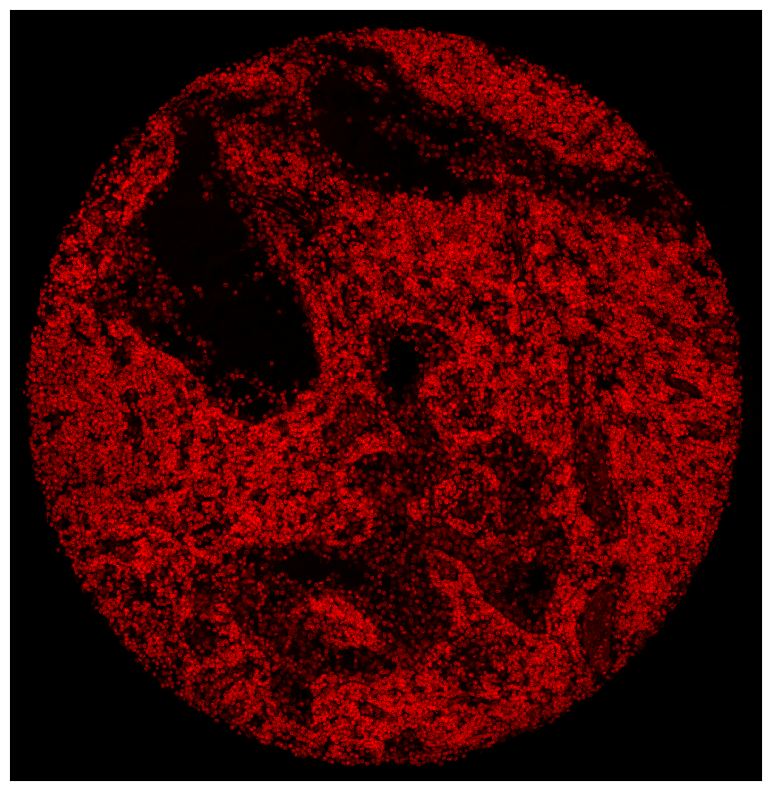

In [45]:
fig = plt.figure(figsize=(8, 8))
_ = ds.pp['DAPI'].pl.autocrop().pl.colorize(colors=['red']).pl.show(legend_image=False)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

## Rendering Segmentation Masks

If your spatialproteomics object contains a segmentation mask, you can simple plot it by setting `render_segmentation` to true.

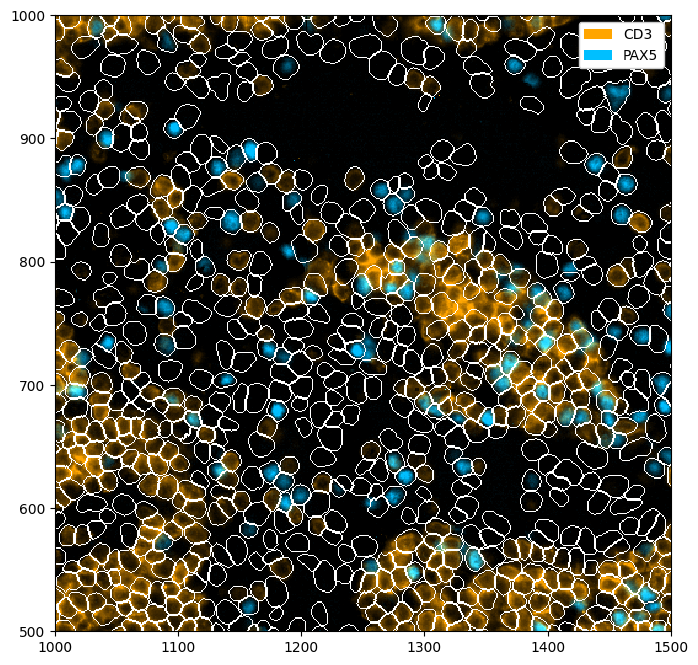

In [46]:
fig = plt.figure(figsize=(8, 8))
_ = ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000].pl.colorize(colors=['orange', 'deepskyblue']).pl.show(render_segmentation=True)

## Rendering Obs

Sometimes, you might want to visualize specific features, such as the cell size. With `spatialproteomics`, you can do this while retaining the cell shapes obtained by the segmentation.

Found _obs in image container. Concatenating.
/home/meyerben/meyerben/.conda/envs/spatprot_vscode_env/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


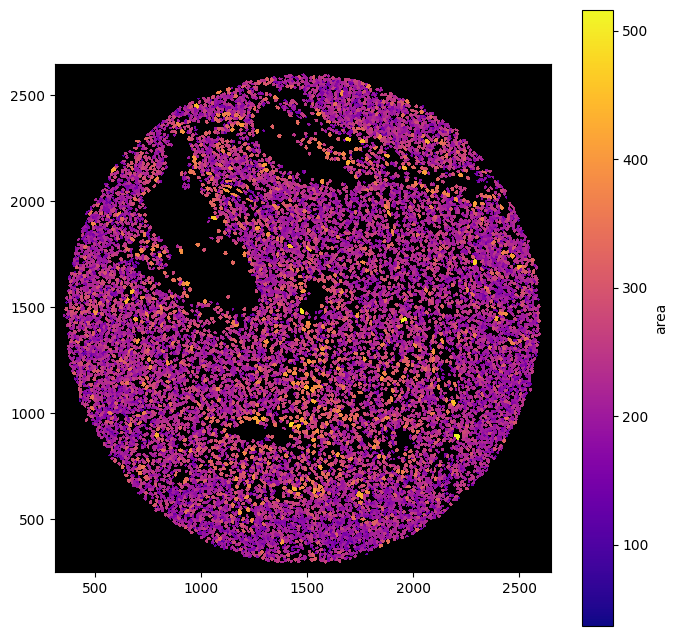

In [47]:
fig = plt.figure(figsize=(8, 8))
_ = ds.pp.add_observations('area').pl.autocrop().pl.render_obs(feature='area', cmap='plasma').pl.imshow(legend_obs=True)

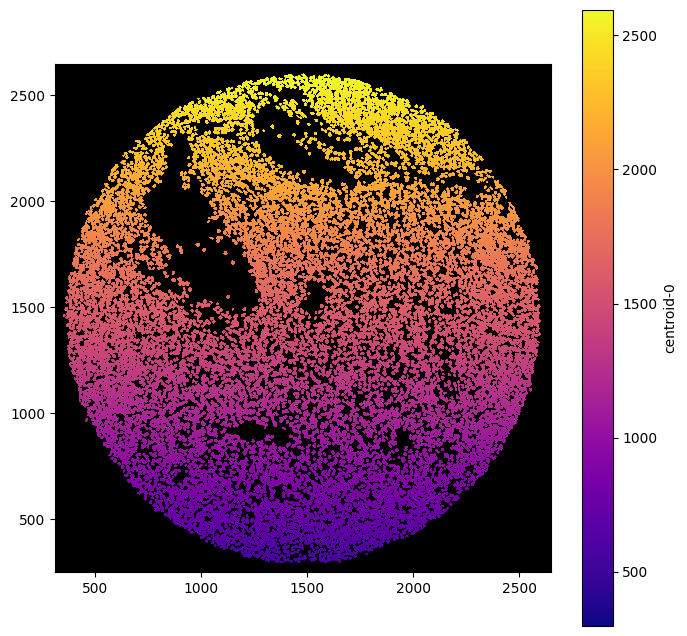

In [48]:
fig = plt.figure(figsize=(8, 8))
_ = ds.pl.autocrop().pl.render_obs(feature='centroid-0', cmap='plasma').pl.imshow(legend_obs=True)

## Rendering Labels

Similar to `render_segmentation`, `pl.show()` also has an argument called `render_labels`, which can be used to render cell type labels. We can simultaneously deactivate the rendering of the intensities to get an image of only the labels.

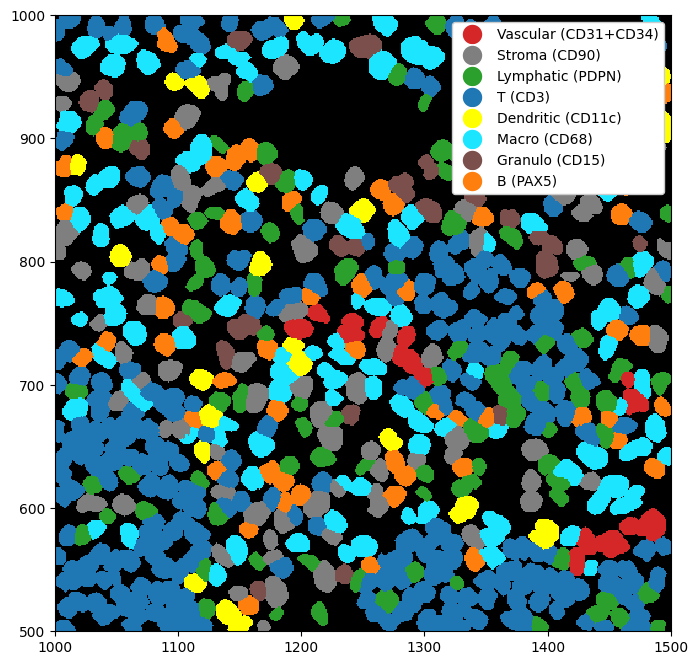

In [50]:
fig = plt.figure(figsize=(8, 8))
_ = ds.pp[1000:1500, 500:1000].pl.show(render_image=False, render_labels=True)

We can combine this with rendering the segmentation masks for a clearer picture of where exactly the cell boundaries lie.

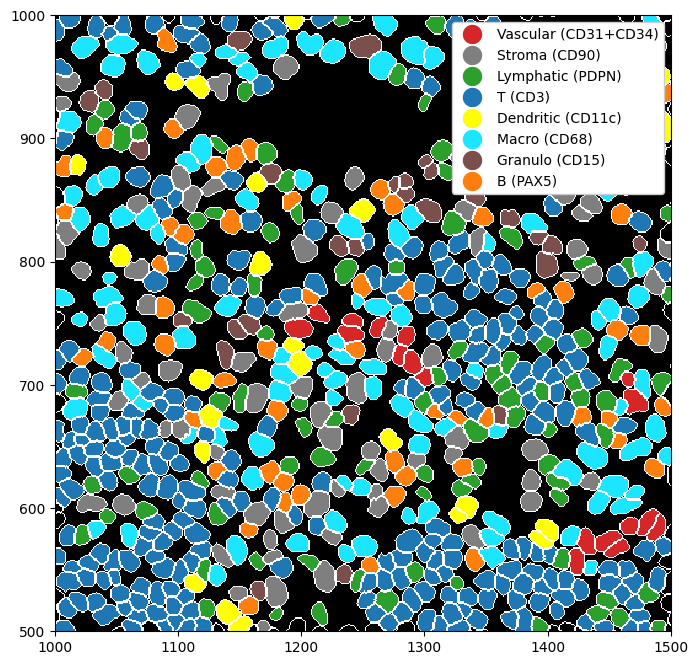

In [51]:
fig = plt.figure(figsize=(8, 8))
_ = ds.pp[1000:1500, 500:1000].pl.show(render_image=False, render_segmentation=True, render_labels=True)

Using the `.la[]` accessor we can also subset cell labels, rather than displaying all of them. We can also use the `la.set_label_colors()` to set custom colors for our labels.

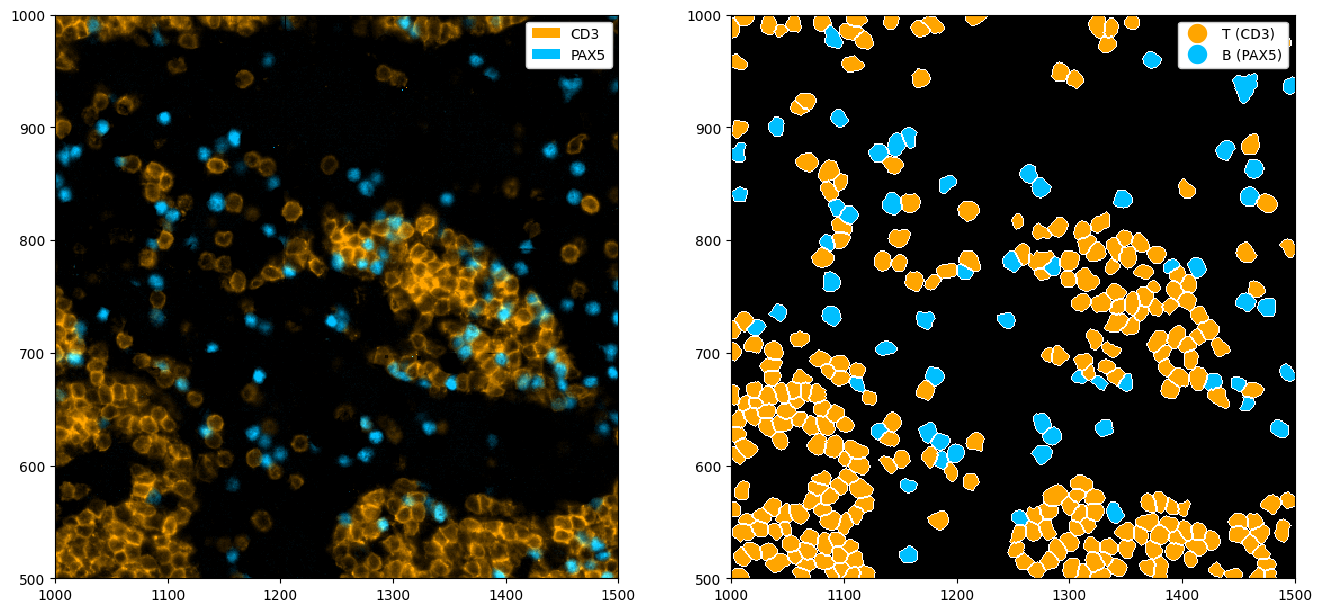

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
_ = ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000].pl.colorize(['orange', 'deepskyblue']).pl.show(ax=ax[0])
_ = ds.pp[1000:1500, 500:1000].la['T (CD3)', 'B (PAX5)'].la.set_label_colors(['T (CD3)', 'B (PAX5)'], ['orange', 'deepskyblue']).pl.show(render_image=False, render_segmentation=True, render_labels=True, ax=ax[1])

## Annotation of Regions or Cells

We can also annotate regions or cells within the plots.

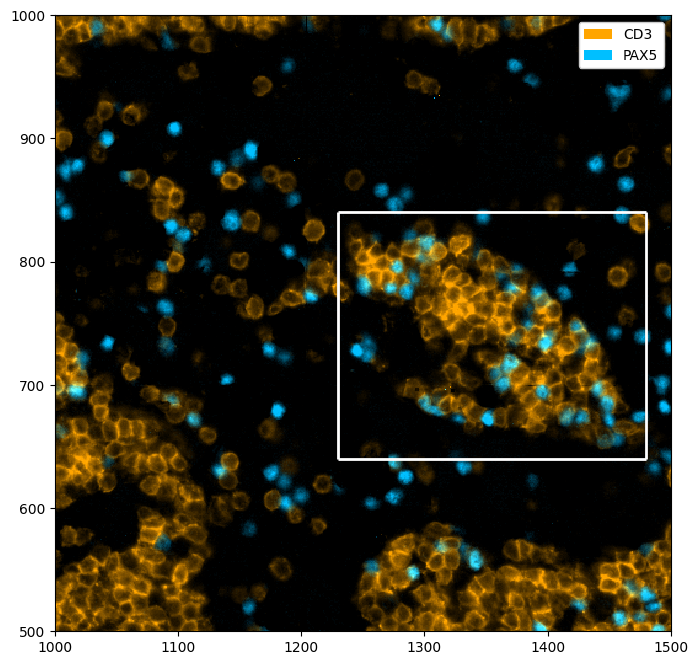

In [53]:
# highlighting a region with pl.add_box()
fig = plt.figure(figsize=(8, 8))
_ = ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000].pl.colorize(colors=['orange', 'deepskyblue']).pl.add_box([1230, 1480], [640, 840]).pl.show()

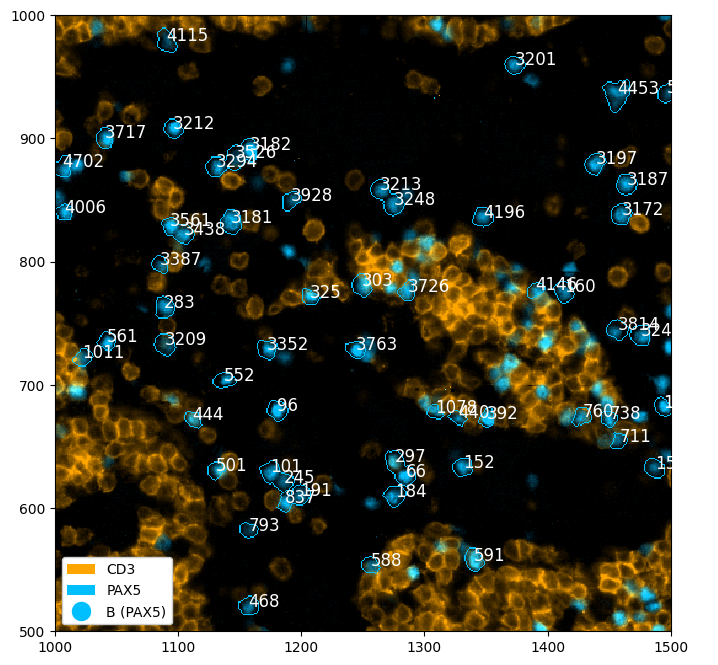

In [54]:
# selecting all B cells and annotating them with pl.annotate()
fig = plt.figure(figsize=(8, 8))
_ = (ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000]
       .la['B (PAX5)']
       .pl.colorize(colors=['orange', 'deepskyblue'])
       .la.set_label_colors(['B (PAX5)'], ['deepskyblue'])
       .pl.annotate()
       .pl.show(render_labels=True, label_kwargs={'alpha': 0.0}))

## Expert Plotting

To gain more control over your plots, you can use the functions `colorize`, `render_segmentation`, and `render_labels` in combination with `imshow` (instead of `show`, which provides a high-level wrapper around these). Those methods allow for more nuanced adjustments of the final plot. Here are a few examples, for more details please consult the documentation of the corresponding methods.

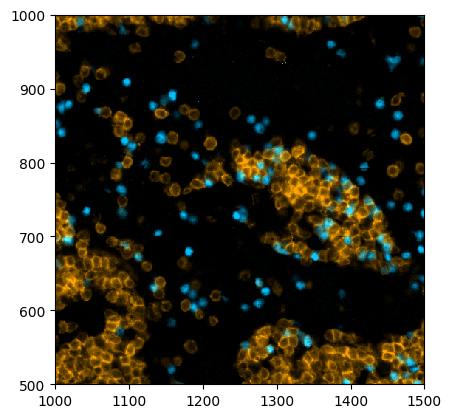

In [55]:
_ = ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000].pl.colorize(colors=['orange', 'deepskyblue']).pl.imshow()

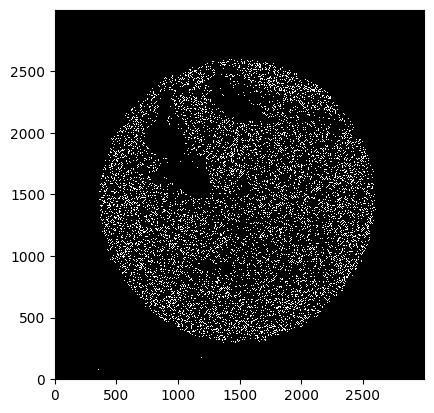

In [56]:
_ = ds.pl.render_segmentation().pl.imshow()

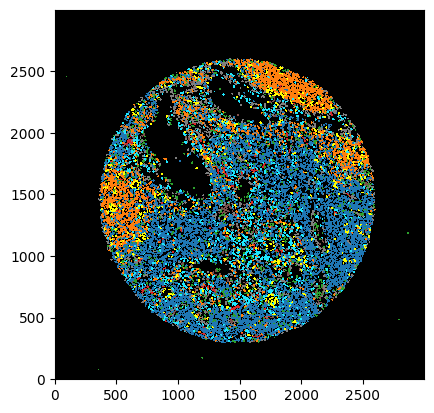

In [57]:
_ = ds.pl.render_labels().pl.imshow()

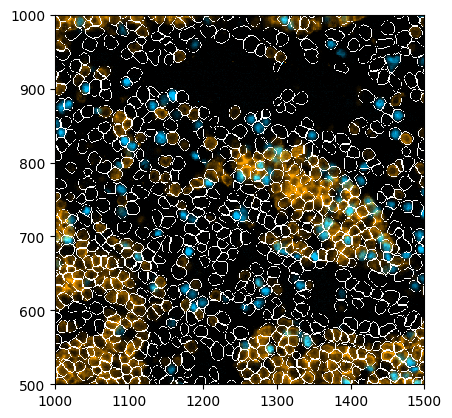

In [58]:
_ = ds.pp[['CD3', 'PAX5'], 1000:1500, 500:1000].pl.colorize(colors=['orange', 'deepskyblue']).pl.render_segmentation().pl.imshow()

You can also use scatterplots instad of always plotting the images.

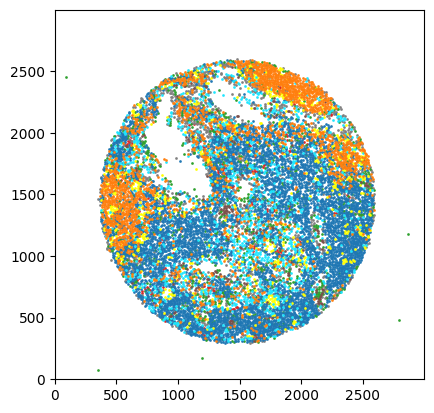

In [59]:
# creating a scatter plot of the labels
_ = ds.pl.scatter_labels(legend=False)

/home/meyerben/meyerben/.conda/envs/spatprot_vscode_env/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


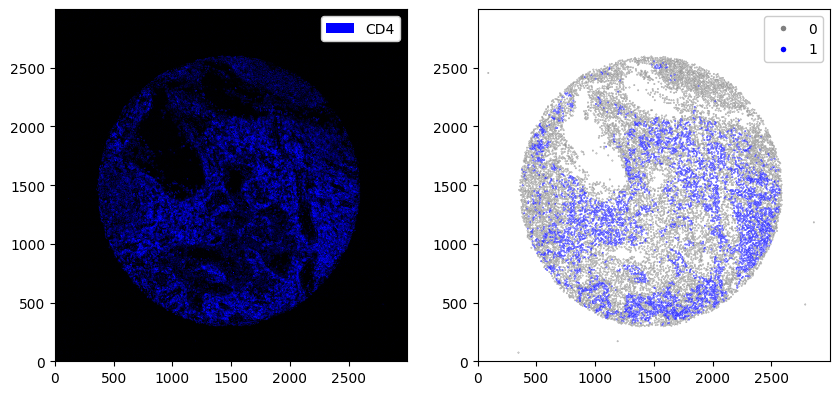

In [60]:
# creating a scatter plot of any categorical variable in obs
# as an example, we are adding a binarization column to the obs
ds_with_binarization_cd4 = ds.la.threshold_labels({'CD4': 2.5}, layer_key='_arcsinh_mean')

fig, ax = plt.subplots(1, 2, figsize=(10, 20))
_ = ds_with_binarization_cd4.pp['CD4'].pl.colorize('blue').pl.show(ax=ax[0])
_ = ds_with_binarization_cd4.pl.scatter(feature='CD4_binarized', size=0.1, palette={0: 'gray', 1: 'blue'}, ax=ax[1])

Found _obs in image container. Concatenating.
/home/meyerben/meyerben/.conda/envs/spatprot_vscode_env/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


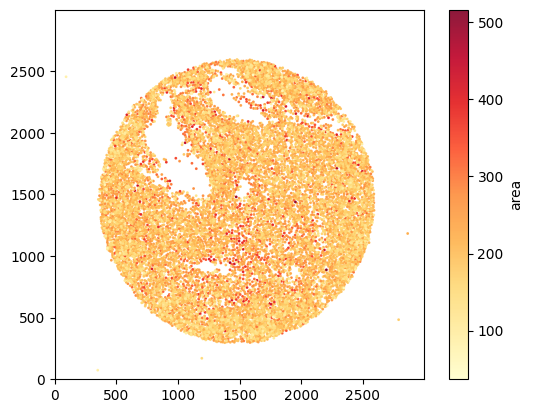

In [61]:
# creating a scatterplot of continuous variables
# adding area of each cell and plotting it
ds_tmp = ds.pp.add_observations('area')
_ = ds_tmp.pl.scatter(feature='area', scatter_kws={'cmap': 'YlOrRd'})

Lastly, if you have multiple segmentation masks, you can show all of them at the same time like this.

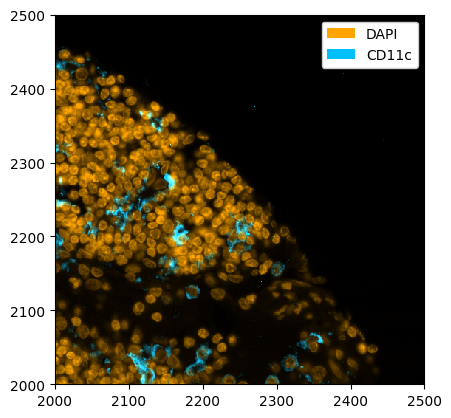

In [62]:
_ = ds.pp[['DAPI', 'CD11c']].pp[2000:2500, 2000:2500].pl.colorize(['orange', 'deepskyblue']).pl.show()

In [75]:
ds_multisegmentation = ds.pp[['DAPI', 'CD11c']].pp[2000:2500, 2000:2500].tl.cellpose()

TORCH CUDA version not installed/working.
>>>> using CPU
>> cyto3 << model set to be used
>>>> loading model /home/meyerben/.cellpose/models/cyto3
>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
channels set to [0, 0]
~~~ ESTIMATING CELL DIAMETER(S) ~~~
/home/meyerben/meyerben/.conda/envs/spatprot_vscode_env/lib/python3.10/site-packages/cellpose/plot.py:39: RuntimeWarning: overflow encountered in square
  mag = np.clip(transforms.normalize99(np.sqrt(np.sum(dP**2, axis=0))), 0, 1.)
/home/meyerben/meyerben/.conda/envs/spatprot_vscode_env/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/meyerben/meyerben/.conda/envs/spatprot_vscode_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/meyerben/meyerben/.conda/envs/spatprot_vscode_env/lib/python3.10/site-packa

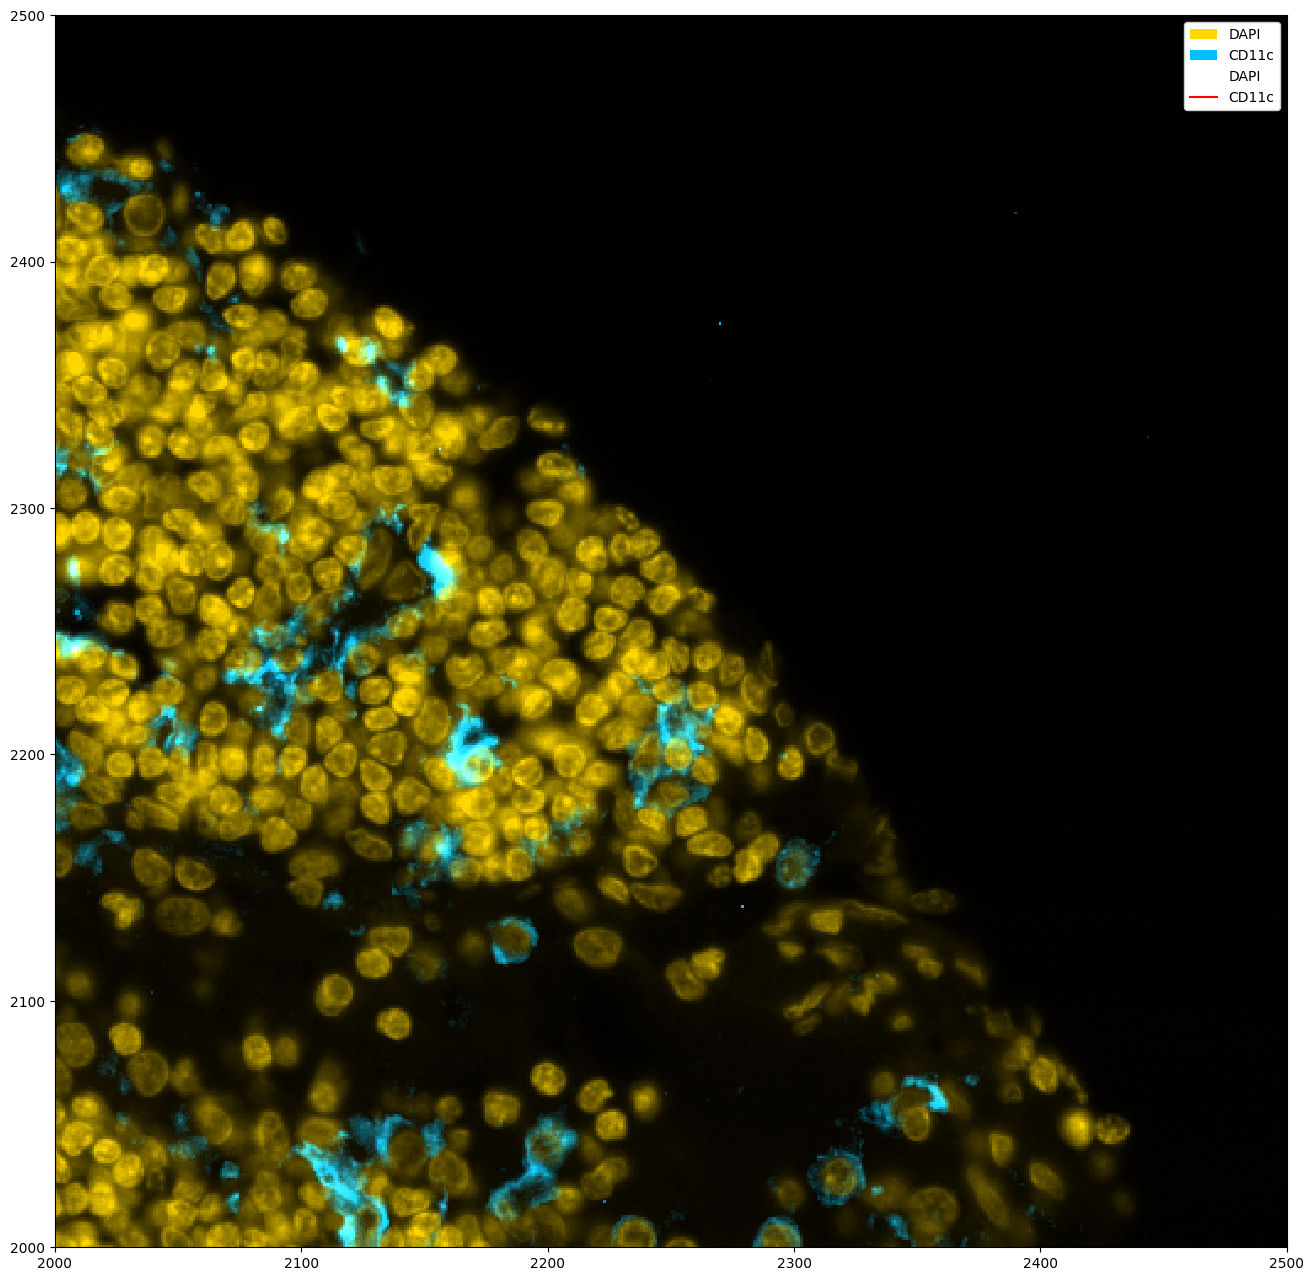

In [79]:
plt.figure(figsize=(16, 16))
_ = (ds_multisegmentation.pl.colorize(['gold', 'deepskyblue']).pl.show(render_segmentation=True, segmentation_kwargs={'layer_key': '_cellpose_segmentation', 'colors': ['white', 'red']}))

We can also plot histograms of any table, for example the observations (e. g. cell area) or the marker distribution.

In [65]:
# quick check what our object looks like
ds_tmp

/g/huber/users/meyerben/notebooks/codex_analysis/2024-03-18_spatialproteomics_package/spatialproteomics/spatialproteomics/pl/plot.py:23: AccessorRegistrationWarning: registration of accessor <class 'spatialproteomics.pl.plot.PlotAccessor'> under name 'pl' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  class PlotAccessor:
/g/huber/users/meyerben/notebooks/codex_analysis/2024-03-18_spatialproteomics_package/spatialproteomics/spatialproteomics/pl/plot.py:23: AccessorRegistrationWarning: registration of accessor <class 'spatialproteomics.pl.plot.PlotAccessor'> under name 'pl' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  class PlotAccessor:
/g/huber/users/meyerben/notebooks/codex_analysis/2024-03-18_spatialproteomics_package/spatialproteomics/spatialproteomics/pl/plot.py:23: AccessorRegistrationWarning: registration of accessor <class 'spatialproteomics.pl.plot.PlotAcces

<xarray.Dataset>
Dimensions:        (cells: 12560, channels: 56, features: 5, labels: 8,
                    props: 2, x: 3000, y: 3000)
Coordinates:
  * cells          (cells) int64 1 2 3 4 5 6 ... 12556 12557 12558 12559 12560
  * channels       (channels) <U11 'DAPI' 'Helios' 'CD10' ... 'CD79a' 'Ki-67'
  * features       (features) <U10 '_labels' '_original_' ... 'centroid-1'
  * labels         (labels) int64 1 2 3 4 5 6 7 8
  * props          (props) <U6 '_color' '_name'
  * x              (x) int64 0 1 2 3 4 5 6 ... 2994 2995 2996 2997 2998 2999
  * y              (y) int64 0 1 2 3 4 5 6 ... 2994 2995 2996 2997 2998 2999
Data variables:
    _arcsinh_mean  (cells, channels) float64 3.111 0.0 1.391 ... 1.324 0.4174
    _arcsinh_sum   (cells, channels) float64 8.346 0.0 6.564 ... 6.625 5.224
    _image         (channels, y, x) uint8 4 4 4 4 5 4 4 3 4 ... 2 2 2 2 2 2 2 2
    _obs           (cells, features) float64 4.0 3.0 ... 2.249e+03 2.237e+03
    _raw_mean      (cells, channels) float64 56.02 0.0 9.426 ... 8.727 2.148
    _raw_sum       (cells, channels) float64 1.053e+04 0.0 ... 1.885e+03 464.0
    _segmentation  (y, x) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    _properties    (labels, props) object 'C3' ... 'B (PAX5)'

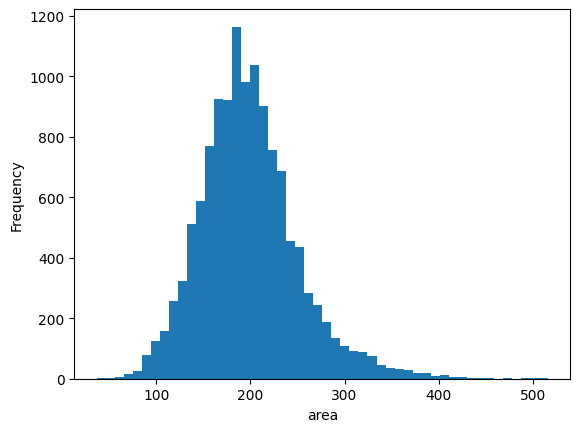

In [66]:
# plotting a histogram for a feature in the obs table
_ = ds_tmp.pl.histogram('area')

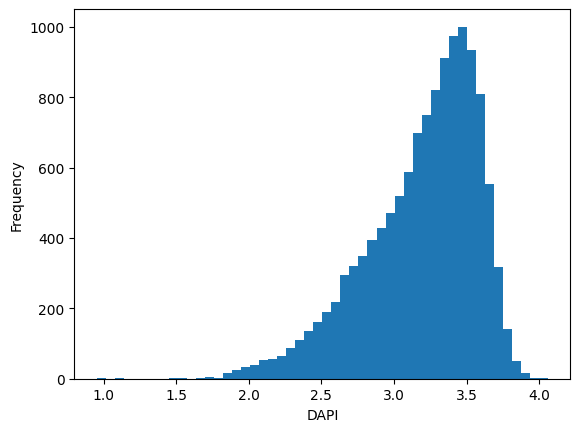

In [67]:
# plotting a histogram for a feature in the expression matrix
_ = ds_tmp.pl.histogram('DAPI', key='_arcsinh_mean')